# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
city_latitude = []
city_longitude = []
max_temperature = []
humidity = []
cloud_coverage = []
wind_speed = []
city_country = []
city_datetime = []
city_name = []

print("Beginning Data Retrieval")    
print("-----------------------------")

record = 1 
set = 1

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_latitude.append(response["coord"]["lat"])
        city_longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["dt"])
        city_name.append(response["name"])

        this_city = response["name"]

        print(f"Processing Record {record} of Set {set} | {this_city}")
        
        record += 1
    
    except KeyError:
        print("City not found. Skipping...")
    
    if record == 51:
        set += 1
        record = 1
        
    time.sleep(1.001)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Punta Arenas
Processing Record 2 of Set 1 | Yulara
Processing Record 3 of Set 1 | Douglas
Processing Record 4 of Set 1 | Xiaoweizhai
Processing Record 5 of Set 1 | Vaini
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Bredasdorp
Processing Record 8 of Set 1 | Mataura
Processing Record 9 of Set 1 | La Ronge
Processing Record 10 of Set 1 | Torbay
Processing Record 11 of Set 1 | Ahipara
Processing Record 12 of Set 1 | Umm Kaddadah
Processing Record 13 of Set 1 | Gizo Government Station
Processing Record 14 of Set 1 | Katsuura
Processing Record 15 of Set 1 | Ballina
Processing Record 16 of Set 1 | Busselton
Processing Record 17 of Set 1 | Rondonópolis
Processing Record 18 of Set 1 | Gucheng
Processing Record 19 of Set 1 | Oskemen
Processing Record 20 of Set 1 | Sarakhs
Processing Record 21 of Set 1 | Provideniya
Processing Recor

Processing Record 35 of Set 4 | Nara
Processing Record 36 of Set 4 | Forsytheganj
Processing Record 37 of Set 4 | Tezu
Processing Record 38 of Set 4 | Pemangkat
Processing Record 39 of Set 4 | Aripuanã
Processing Record 40 of Set 4 | Pacifica
Processing Record 41 of Set 4 | Pychas
Processing Record 42 of Set 4 | Lesogorsk
Processing Record 43 of Set 4 | Port Alfred
Processing Record 44 of Set 4 | Araouane
Processing Record 45 of Set 4 | High Level
Processing Record 46 of Set 4 | Yaroslavl
Processing Record 47 of Set 4 | Thompson
Processing Record 48 of Set 4 | Ambon City
Processing Record 49 of Set 4 | Abéché
Processing Record 50 of Set 4 | Tūkrah
Processing Record 1 of Set 5 | Elko
Processing Record 2 of Set 5 | Cap-Haïtien
Processing Record 3 of Set 5 | Saldanha
Processing Record 4 of Set 5 | Port Hedland
Processing Record 5 of Set 5 | Humboldt
Processing Record 6 of Set 5 | Chicama
Processing Record 7 of Set 5 | Lompoc
Processing Record 8 of Set 5 | Naryan-Mar
Processing Record 9 of

City not found. Skipping...
Processing Record 21 of Set 8 | Kisangani
Processing Record 22 of Set 8 | Inhambane
Processing Record 23 of Set 8 | Province of Mantua
Processing Record 24 of Set 8 | Vuktyl
Processing Record 25 of Set 8 | Ostrovnoy
Processing Record 26 of Set 8 | Evensk
Processing Record 27 of Set 8 | Klaksvík
Processing Record 28 of Set 8 | Rawson
Processing Record 29 of Set 8 | Alice Springs
Processing Record 30 of Set 8 | Aberdeen
Processing Record 31 of Set 8 | Rumphi
Processing Record 32 of Set 8 | Paita
City not found. Skipping...
Processing Record 33 of Set 8 | Jamame
Processing Record 34 of Set 8 | Furmanov
Processing Record 35 of Set 8 | San-Pédro
Processing Record 36 of Set 8 | Bathsheba
City not found. Skipping...
Processing Record 37 of Set 8 | Bilibino
Processing Record 38 of Set 8 | Podporozh'ye
Processing Record 39 of Set 8 | Millinocket
Processing Record 40 of Set 8 | Eureka
Processing Record 41 of Set 8 | Liliongan
Processing Record 42 of Set 8 | Sangīn
Pro

Processing Record 7 of Set 12 | Bodden Town
Processing Record 8 of Set 12 | Colac
Processing Record 9 of Set 12 | Santa Maria da Boa Vista
Processing Record 10 of Set 12 | Barcelona
Processing Record 11 of Set 12 | Manono
Processing Record 12 of Set 12 | La Libertad
Processing Record 13 of Set 12 | Mumford
Processing Record 14 of Set 12 | Lillooet
Processing Record 15 of Set 12 | Castelo do Piauí
Processing Record 16 of Set 12 | Puerto Baquerizo Moreno
Processing Record 17 of Set 12 | Kushmurun
Processing Record 18 of Set 12 | Río Gallegos
Processing Record 19 of Set 12 | Grand-Lahou
Processing Record 20 of Set 12 | Alta Floresta
Processing Record 21 of Set 12 | Stranda
Processing Record 22 of Set 12 | Qui Nhon
Processing Record 23 of Set 12 | Ambilobe
Processing Record 24 of Set 12 | Omboué
Processing Record 25 of Set 12 | Novotitarovskaya
Processing Record 26 of Set 12 | General Roca
Processing Record 27 of Set 12 | Zhengjiatun
Processing Record 28 of Set 12 | Montemarciano
Processin

## Convert Raw Data to DataFrame
* Save as csv

In [5]:
weather_check = {"City" : city_name, "Lat" : city_latitude, "Lng" : city_longitude, "Max Temp" : max_temperature, 
                 "Humidity" : humidity, "Cloudiness" : cloud_coverage, "Wind Speed" : wind_speed, 
                 "Country" : city_country, "Date" : city_datetime}

weather_check_df = pd.DataFrame(weather_check)

weather_check_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,46.40,70,75,9.17,CL,1602852059
1,Yulara,-25.24,130.99,86.00,17,0,8.05,AU,1602852060
2,Douglas,41.30,-96.17,36.00,86,40,5.82,US,1602852061
3,Xiaoweizhai,26.19,107.51,52.81,90,100,6.96,CN,1602851766
4,Vaini,-21.20,-175.20,75.20,94,90,5.82,TO,1602852064


In [6]:
weather_check_df.to_csv('../Output/weather_check.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

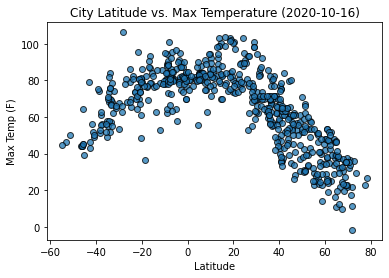

In [7]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Max Temp"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_temp.png")

To briefly discuss latitude, which is the measure the x-axis focuses on in the above, and next three scatter plots;  it is a city's north-south position, where latitude at the equator is measured as 0&deg; and increases towards 90&deg; as a city gets closer to the north pole and decreases towards -90&deg; as a city gets closer to the south pole. 

The above scatter plot vizualizes how a world city's latitute is related to the city's temperature. As mentioned above, the equator sits at 0&deg; latitude, and based off what we can see in this plot, as a city's latitude gets closer to 0, it's maximum temperature is greater. Whereas city's whose latitude is further from 0, have lower maximum temperatures. Therefore, it can be concluded based on the data, that city's that are closer to the equator are relatively warmer than cities that are further away. 

### Latitude vs. Humidity Plot

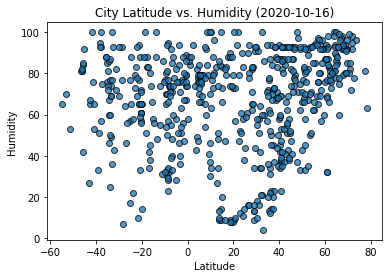

In [8]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Humidity"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_humidity.png")

This next scatter plot shows the relationship between a world city's latitude and the humidity in that city. As shown in the scatter plot, there is really no clear relationship between latitude and humidity, but there is a larger cluster of data points in the top righthand corner of the plot, so maybe there is something to say about cities closer to the north pole with higher temperatures, but nothing can be determined from this plot. 

### Latitude vs. Cloudiness Plot

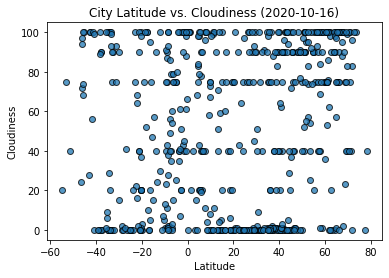

In [9]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Cloudiness"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_cloudiness.png")

Similarly to the humidity scatter plot, this plot, which looks at the relationship between city latitude and cloudiness does not indicate any strong relationship between the two. Again, there are more densely clustered data points along the bottom and top of the plot, where 0% cloudiness and 100% cloudiness data points sit, but nothing definitive can be said about this relationship based on this plot. 

### Latitude vs. Wind Speed Plot

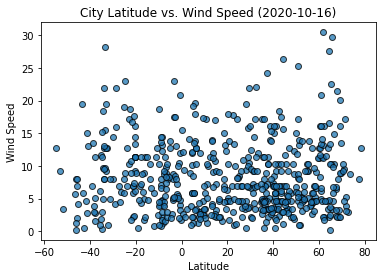

In [26]:
plt.scatter(weather_check_df["Lat"], weather_check_df["Wind Speed"], marker = "o", edgecolor = "black", alpha = .75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")

plt.savefig("../Images/lat_vs_wind_speed.png")

This last scatter plot looks at the relationship between city latitude and wind speed. The data points are most densely populated all along the bottom of the graph, with a pretty even spread of datapoints having higher wind speeds. Again, it would be pretty difficult to say anything about the relationship between latitude and wind speed based solely off the scatter plot shown.

## Linear Regression

In [53]:
northern_hemisphere = weather_check_df.loc[weather_check_df["Lat"] >= 0]
southern_hemisphere = weather_check_df.loc[weather_check_df["Lat"] < 0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

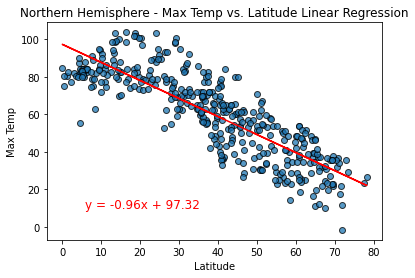

The r-value is: -0.8438544474914274


In [54]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/northern_max_temp_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

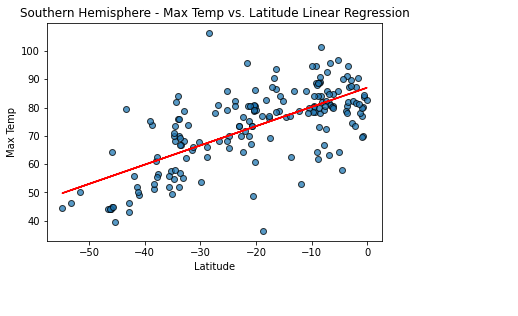

The r-value is: 0.6839707833902061


In [55]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/southern_max_temp_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

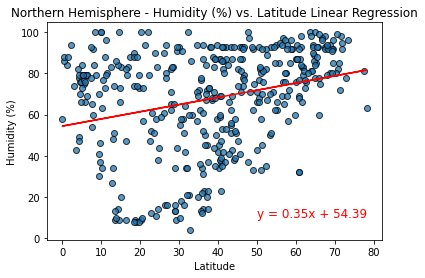

The r-value is: 0.27628777543342337


In [56]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_humidity_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

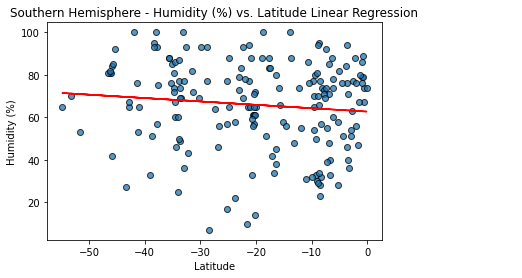

The r-value is: -0.10863245578130513


In [57]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_humidity_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

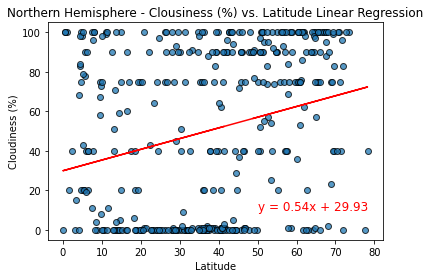

The r-value is: 0.25980284448394064


In [58]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Clousiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_clousiness_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

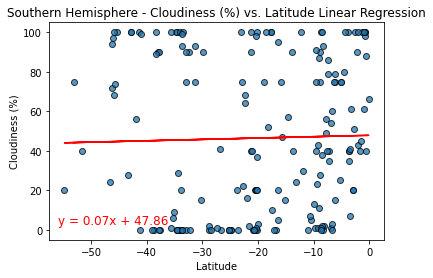

The r-value is: 0.024895835737588863


In [59]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,3), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_cloudiness_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

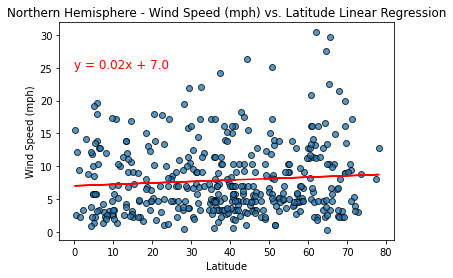

The r-value is: 0.08121371887014457


In [61]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("../Images/northern_wind_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

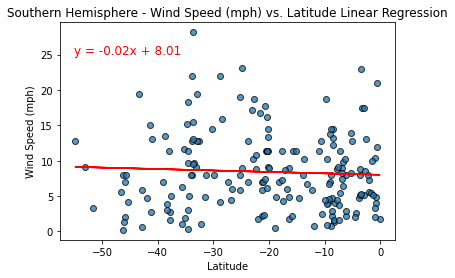

The r-value is: -0.05296622758938612


In [63]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 25), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("../Images/southern_wind_linregress.png")
plt.show()

print(f"The r-value is: {rvalue}")